<a href="https://colab.research.google.com/github/dmikota/Phys_440/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Import statements ####


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score




In [ ]:
## Here I am reading the data

data = pd.read_csv("https://raw.githubusercontent.com/dmikota/Phys_440/main/housing.csv")
print(data.head())
print("We have", data.shape[0], "rows of data with ", data.shape[1], "columns")

data.isnull().sum() # this shows us if there are any values that are NAN, we can see that there is 207 total_bedrooms data points that are NAN



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
We have 20640 rows of data with  10 columns


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Cleaning the data. I will remove all the columns of data that have NAN values. We can see that all the NAN values are spefically found in the total_bedrooms feature.

In [ ]:
data.dropna(how = 'any',inplace = True) 

# Now to see the sum of all the Nan terms,

data.isnull().sum() 
# which is now zero 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

We must first divide the data frame into 2 arrays. One array has the house price value while the other array has all the other features.

In [ ]:
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
y = data["median_house_value"]       



Now lets us split our data into 2 sets. Our training set and our test set. We will split up the data using sklearn built in function. The 3 blocks of data are there to aid in the creation of the error bars that we will need later for our scatter plots.





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.30, random_state=49)

######    The test_size is referring to the percentage that of the whole data that will be convrted into test data.
#####     The random_state is how random that the splitting will be. If someonne chooses a different number than they will
###       get a slightly different predictions than us.

X1_train, X1_test, y1_train, y1_test = train_test_split(   X, y, test_size=0.30, random_state=5)

X2_train, X2_test, y2_train, y2_test = train_test_split(   X, y, test_size=0.30, random_state=80)


Now that we've split our data we can fit our model on the training data. 

We will begin with a creating a linear regression model algorithm to model the predictions.

[-4.24459688e+04 -4.25729529e+04  1.15264857e+03 -8.30617365e+00
  1.22495469e+02 -3.79296110e+01  3.62909066e+01  4.04907178e+04] This shows us the weights or the coefficients of each variable.


Text(0.5, 1.0, 'House price prediction using linear regression with 8 coefficients')

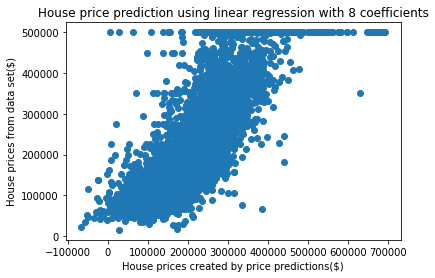

In [ ]:
from sklearn.linear_model import LinearRegression

#### We need to create a LinearRegression model. So we will instatiate it with the variable inst
inst = LinearRegression()

inst.fit(X_train, y_train)    ## Fitting our liner regression model onto our training data 
inst.fit(X1_train, y1_train)
inst.fit(X2_train, y2_train)


print(inst.coef_,'This shows us the weights or the coefficients of each variable.')






#### We now want to make prediction on data that the model hasn't see before.



price_predictions = inst.predict(X_test)
price_predictions1 = inst.predict(X1_test)
price_predictions2 = inst.predict(X2_test)


## price_predictions is an array with house values based on the other features.





plt.scatter(price_predictions, y_test)
plt.ylabel("House prices from data set($)")
plt.xlabel("House prices created by price predictions($)")
plt.title("House price prediction using linear regression with 8 coefficients")


The following code is to create the error bars for the above plot.

In [ ]:
#Cycling through to find the average 
mean_list = []
stand_dev_list = []
y_test_list = []

# I needed to cast the y_test as list's since they were originally series. Series are a lot more tedious to work with.

y_test = list(y_test)
y1_test = list(y1_test)
y2_test = list(y2_test)


for i in range(len(price_predictions)):
  mean = (price_predictions[i] + price_predictions1[i] + price_predictions2[i]) /3
  y_test_avg =  (y_test[i] +  y1_test[i] +  y2_test[i]) / 3
  
  stand_dev = np.std(mean)
 
  mean_list.append(mean)
  stand_dev_list.append(stand_dev)

  y_test_list.append(y_test_avg)

Text(0.5, 1.0, 'House price prediction using average price with 3 different random states')

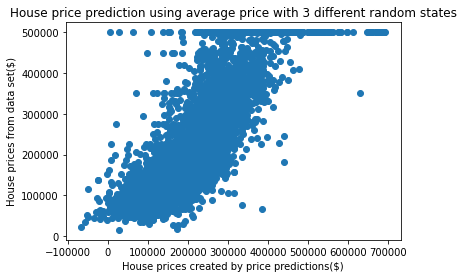

In [ ]:
### Plotting but now with the error bars

#price_predictions, y_test
plt.errorbar(price_predictions, y_test,stand_dev_list,fmt="o")
#mean_list,y_test_list)

plt.ylabel("House prices from data set($)")
plt.xlabel("House prices created by price predictions($)")
plt.title("House price prediction using average price with 3 different random states")




The error bars are so small that we can't even see them on our plots.

I will now determine the most signifcant feature in my dataset my making a bar graph that shows the weights of each feature.

Text(0.5, 1.0, 'The weight of features determined by the linear regression fit ')

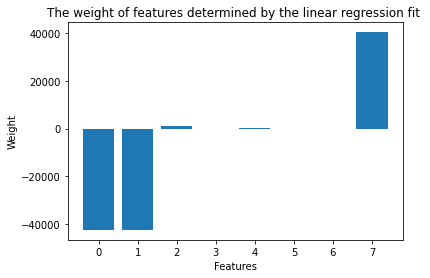

In [ ]:
variables = np.arange(0,8,1)


plt.bar(variables,inst.coef_)
plt.ylabel("Weight")
plt.xlabel("Features")
plt.title("The weight of features determined by the linear regression fit ")

I will now redo the fitting and predictions using only the 3 variables that have a large weight. Specifically, the longititude, the lattitude and the median income.

[-49622.03744274 -48293.36997152  36519.30127194] This shows us the weights or the coefficients of each variable.
74369.55627336337
0.5877662573066766


Text(0.5, 0, 'House prices created by price predictions($)')

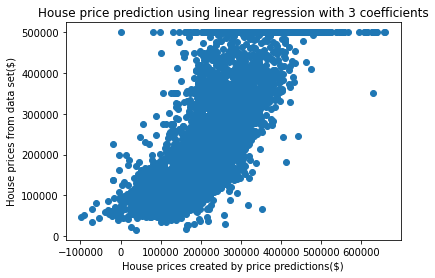

In [ ]:
X_removed = data[['longitude', 'latitude','median_income',]]
y_removed = data["median_house_value"]     


X_train_remo, X_test_remo, y_train_remo, y_test_remo = train_test_split(   X_removed, y_removed, test_size=0.30, random_state=49)



inst.fit(X_train_remo, y_train_remo)    ## Fitting our linera regression model onto our training data 




print(inst.coef_,'This shows us the weights or the coefficients of each variable.')





price_predictions_remo = inst.predict(X_test_remo)

plt.scatter(price_predictions_remo,y_test_remo)

print(np.sqrt(mean_squared_error(y_test_remo, price_predictions_remo)))
print(r2_score(y_test_remo, price_predictions_remo))
plt.title("House price prediction using linear regression with 3 coefficients")
plt.ylabel("House prices from data set($)")
plt.xlabel("House prices created by price predictions($)")

We will now use root mean square deviation to get a metric on the fit on our linear regression model. Using 3 coefficients versus 8 coefficients.

In [ ]:

print('the R sqaured score for 8 coefficients is ', r2_score(y_test, price_predictions), 'while for 3 coefficients', r2_score(y_test_remo, price_predictions_remo) )


the R sqaured score for 8 coefficients is  0.6459599200618611 while for 3 coefficients 0.5877662573066766


The R squared is higher for 8 coefficients meaning that all features are essential in the fit.